In [1]:

import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
import plotly.express as px
%matplotlib inline
df = pd.read_csv('C:/Users/prati/OneDrive - University Of Houston/Acadmics/Data Mining/PS-2/Complex8_N15.csv')
import pyod
from sklearn.model_selection import train_test_split

In [2]:
df.index = df.index+1
df.columns

Index(['Unnamed: 0', 'V1', 'V2', 'V3'], dtype='object')

In [3]:
df.drop (['Unnamed: 0'], axis=1, inplace=True)
df.columns

Index(['V1', 'V2', 'V3'], dtype='object')

In [4]:
df

,V1,V2,V3
1,563.225000,56.748000,0
2,564.887000,58.119000,0
3,565.434000,68.061000,0
4,565.926000,79.953000,0
5,566.762000,69.405000,0
...,...,...,...
2929,830.491459,169.489523,7
2930,202.010517,355.093765,6
2931,296.470839,309.699569,6
2932,110.791454,249.134890,2


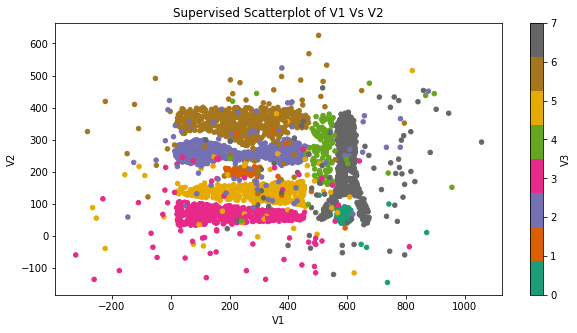

In [154]:
fig, ax = plt.subplots()
df.plot(kind='scatter',x='V1', y='V2', c='V3', ax=ax, cmap= 'Dark2',figsize= (10,5))
plt.title('Supervised Scatterplot of V1 Vs V2')
plt.show()

In [6]:
df_sub = df[["V1", "V2"]]
df_sub

,V1,V2
1,563.225000,56.748000
2,564.887000,58.119000
3,565.434000,68.061000
4,565.926000,79.953000
5,566.762000,69.405000
...,...,...
2929,830.491459,169.489523
2930,202.010517,355.093765
2931,296.470839,309.699569
2932,110.791454,249.134890


# KNN

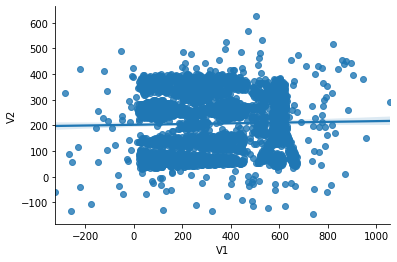

In [7]:
sns.regplot(x="V1", y="V2", data=df_sub)
sns.despine();

In [8]:
y = df.V3


In [155]:
from pyod.models.knn import KNN
m_name = 'KNN'
clf = KNN()
clf.fit(df_sub)
dfscores = clf.decision_scores_
len(dfscores)

array([12.29601281, 11.83700519,  8.56197025, ..., 11.09915624,
       11.11977542,  7.3103056 ])

In [10]:
test_pred = clf.predict(df_sub)
unique, counts = np.unique(test_pred, return_counts=True)
dict(zip(unique, counts))

{0: 2704, 1: 229}

In [11]:
testscores = clf.decision_function(df_sub)
testscores

array([11.50581828,  9.95703636,  7.22466532, ..., 10.51686496,
        9.76967528,  5.22893386])

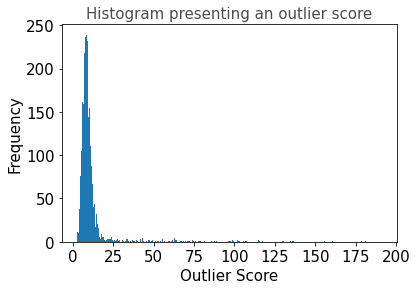

In [177]:
plt.hist(testscores, bins='auto')
plt.title('Histogram presenting an outlier score',fontsize=15, alpha=0.7)
plt.xlabel('Outlier Score',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [13]:
df_test = pd.DataFrame(df_sub)
df_test['OLS'] = testscores
df_test['Cluster'] = np.where(df_test['OLS']<25,0,1)
df_test.value_counts('Cluster')
df_test.groupby('Cluster').mean().round(2)
#df_test[df_test['Cluster']==1]


,V1,V2,OLS
Cluster,,,
0,325.11,208.02,8.86
1,396.71,188.49,66.34


In [14]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
dfstd_norm = standardizer(df_sub)
knn_nos = 20
k_list= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 
 120, 130, 140, 150, 160, 170, 180, 190, 200]
knn_scores = np.zeros([df_sub.shape[0], knn_nos])

knn_scores.shape


C:\Users\prati\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


(2933, 20)

In [165]:
for i in range(knn_nos):
    k = k_list[i]
    clf = KNN(n_neighbors=k, method='largest')
    clf.fit(dfstd_norm)
    print('Base detector %i is fitted for prediction' % i)

Base detector 0 is fitted for prediction
Base detector 1 is fitted for prediction
Base detector 2 is fitted for prediction
Base detector 3 is fitted for prediction
Base detector 4 is fitted for prediction
Base detector 5 is fitted for prediction
Base detector 6 is fitted for prediction
Base detector 7 is fitted for prediction
Base detector 8 is fitted for prediction
Base detector 9 is fitted for prediction
Base detector 10 is fitted for prediction
Base detector 11 is fitted for prediction
Base detector 12 is fitted for prediction
Base detector 13 is fitted for prediction
Base detector 14 is fitted for prediction
Base detector 15 is fitted for prediction
Base detector 16 is fitted for prediction
Base detector 17 is fitted for prediction
Base detector 18 is fitted for prediction
Base detector 19 is fitted for prediction


In [16]:
knn_scores[:, i] = clf.decision_scores_
 
knn_scores

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.71270643],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.67653601],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.63003973],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.50899115],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.44350748],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.54465293]])

In [17]:
knn_scores_norm = standardizer(knn_scores)
knn_scores_norm

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.11655083],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.14469531],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.18087443],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.27506327],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.32601662],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.24731456]])

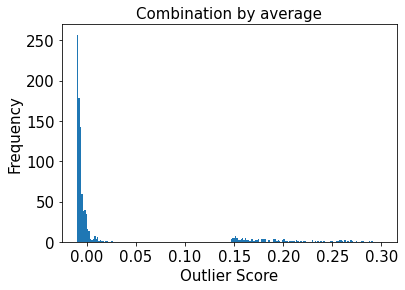

In [182]:
avg_score = average(knn_scores_norm)
plt.hist(avg_score, bins='auto', range= [-0.01, 0.3])
plt.title("Combination by average", fontsize=15)
plt.xlabel('Outlier Score',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)          
plt.show()

In [47]:

df_test = pd.DataFrame(df_sub)
df_test['y_by_average_score'] = avg_score
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<0.00, 0, 1)
df_test['y_by_average_cluster'].value_counts()


0    2718
1     215
Name: y_by_average_cluster, dtype: int64

In [48]:
df_test.groupby('y_by_average_cluster').mean()

,V1,V2,OLS,Cluster,y_by_average_score
y_by_average_cluster,,,,,
0,325.542211,207.119476,8.652379,0.000000,-0.011496
1,369.874502,205.674690,51.828161,0.702326,0.145327


<AxesSubplot:xlabel='V1', ylabel='V2'>

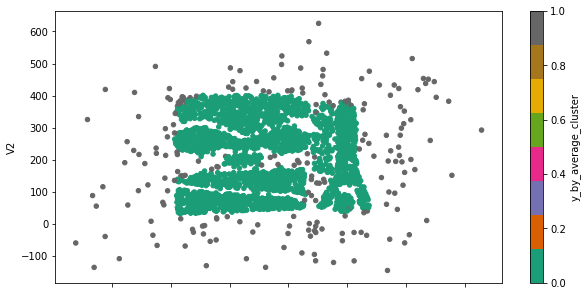

In [50]:
df_test.plot.scatter(x='V1', y='V2',c= 'y_by_average_cluster', colormap= 'Dark2',figsize= (10,5) )


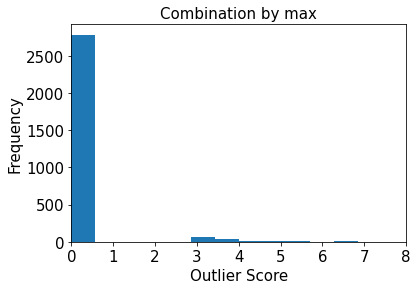

In [184]:
y_by_maximization = maximization(knn_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto', range=(0,8)) 
plt.title("Combination by max",fontsize=15)
plt.xlabel('Outlier Score',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)       
plt.xlim([0,8])
plt.show()

In [66]:
df_test = pd.DataFrame(df_sub)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<0.05, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    2745
1     188
Name: y_by_maximization_cluster, dtype: int64

In [195]:
y_max=df_test.groupby('y_by_maximization_cluster').mean()
y_max[['V1', 'V2','OLS', 'y_by_maximization_score' ]]

,V1,V2,OLS,y_by_maximization_score
y_by_maximization_cluster,,,,
0,325.474908,207.916058,8.700370,0.000223
1,377.224075,193.836239,57.328217,3.320725


<AxesSubplot:xlabel='V1', ylabel='V2'>

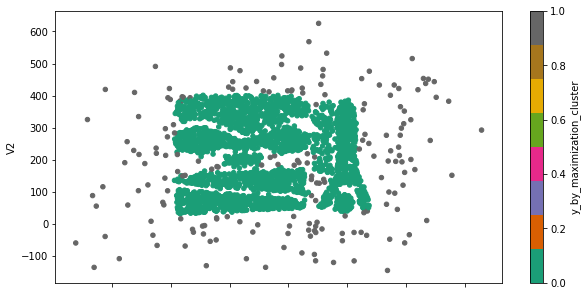

In [68]:
df_test.plot.scatter(x='V1', y='V2',c= 'y_by_maximization_cluster', colormap= 'Dark2',figsize= (10,5) )


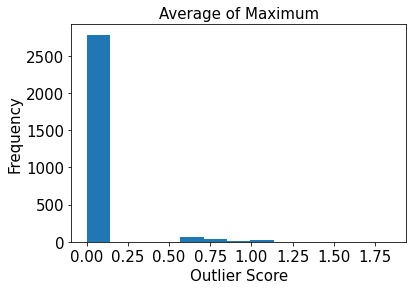

In [198]:
y_by_aom = aom(knn_scores_norm, n_buckets=5)
             
plt.hist(y_by_aom, bins='auto') 
plt.title("Average of Maximum",fontsize=15)
plt.xlabel('Outlier Score',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [70]:
df_test = pd.DataFrame(df_sub)
df_test['y_by_aom_score'] = y_by_aom
df_test['y_by_aom_cluster'] = np.where(df_test['y_by_aom_score']<0.125, 0, 1)
df_test['y_by_aom_cluster'].value_counts()

0    2782
1     151
Name: y_by_aom_cluster, dtype: int64

In [203]:
y_aom = df_test.groupby('y_by_aom_cluster').mean()

y_aom[['V1', 'V2','OLS', 'y_by_aom_score'] ]

,V1,V2,OLS,y_by_aom_score
y_by_aom_cluster,,,,
0,325.105726,208.019181,8.857743,0.000542
1,396.706076,188.486294,66.344230,0.817709


<AxesSubplot:xlabel='V1', ylabel='V2'>

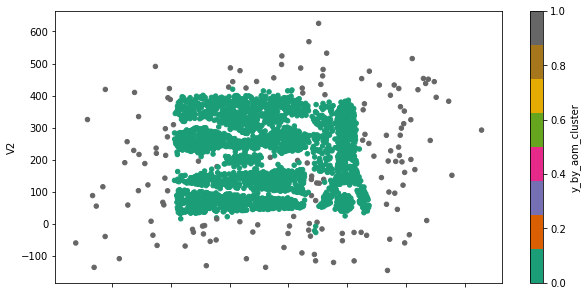

In [72]:
df_test.plot.scatter(x='V1', y='V2',c= 'y_by_aom_cluster', colormap= 'Dark2',figsize= (10,5) )

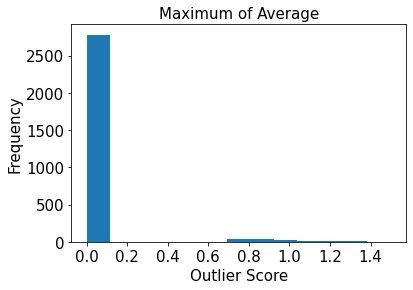

In [204]:
y_by_moa = moa(knn_scores_norm, n_buckets=5)

plt.hist(y_by_moa, bins='auto', range=(0,1.5)) 
plt.title("Maximum of Average",fontsize=15)
plt.xlabel('Outlier Score',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [84]:
df_test = pd.DataFrame(df_sub)
df_test['y_by_moa_score'] = y_by_moa
df_test['y_by_moa_cluster'] = np.where(df_test['y_by_moa_score']<0.100, 0, 1)
df_test['y_by_moa_cluster'].value_counts()

0    2779
1     154
Name: y_by_moa_cluster, dtype: int64

In [205]:
y_moa = df_test.groupby('y_by_moa_cluster').mean()
y_moa[['V1', 'V2', 'y_by_moa_score']]

,V1,V2,y_by_moa_score
y_by_moa_cluster,,,
0,324.925704,208.263489,0.000559
1,398.559853,184.458159,1.004373


<AxesSubplot:xlabel='V1', ylabel='V2'>

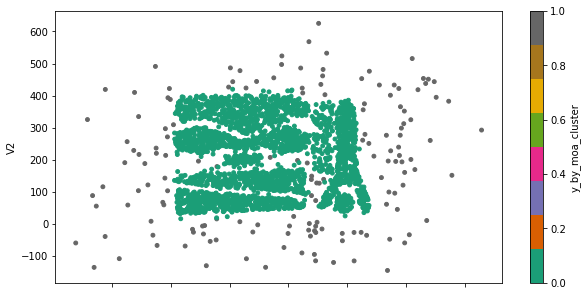

In [150]:
df_test.plot.scatter(x='V1', y='V2',c= 'y_by_moa_cluster', colormap= 'Dark2',figsize= (10,5), s=15 )

In [118]:
df_final = df_test[['V1','V2', 'y_by_maximization_score', 'y_by_maximization_cluster']]
df_final.sort_values(by='y_by_maximization_score', ascending=False, inplace=True)
df_final

,V1,V2,y_by_maximization_score,y_by_maximization_cluster
2884,-260.826641,-135.295733,9.234291,1
2851,1057.381435,292.557139,8.860470,1
2751,-283.459797,325.352742,8.595261,1
2907,-222.692610,419.199246,8.480466,1
2607,956.494535,151.661096,7.694791,1
...,...,...,...,...
926,223.480000,72.010000,0.000000,0
931,227.091000,49.349000,0.000000,0
930,226.773000,53.108000,0.000000,0
929,226.199000,90.138000,0.000000,0


In [122]:
V3 = df['V3'] 
df_final = pd.concat([df_final, V3], axis=1, join='inner')


In [149]:
df_final[['V1', 'V2', 'V3', 'y_by_maximization_score', 'y_by_maximization_cluster']]

,V1,V2,V3,y_by_maximization_score,y_by_maximization_cluster
2884,-260.826641,-135.295733,3,9.234291,1
2851,1057.381435,292.557139,7,8.860470,1
2751,-283.459797,325.352742,6,8.595261,1
2907,-222.692610,419.199246,6,8.480466,1
2607,956.494535,151.661096,4,7.694791,1
...,...,...,...,...,...
926,223.480000,72.010000,3,0.000000,0
931,227.091000,49.349000,3,0.000000,0
930,226.773000,53.108000,3,0.000000,0
929,226.199000,90.138000,3,0.000000,0


In [128]:
df7 = df_final.head(int(len(df_final)*(7/100)))
df93 = df_final[~df_final.isin(df7)].dropna()
pd.merge(df93,df7, how='inner')

,V1,V2,y_by_maximization_score,y_by_maximization_cluster,V3


Text(0.5, 1.0, 'Supervised scatterplot for remaining 93% observations')

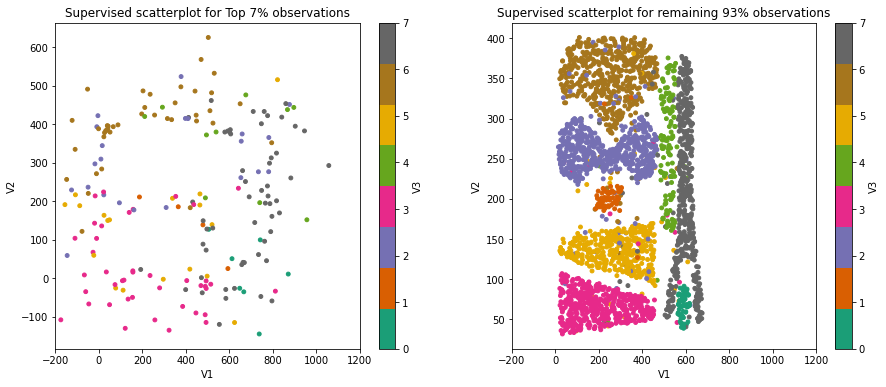

In [217]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
df7.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[0], s=15)
df93.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[1], s=15)
axes[0].set_title('Supervised scatterplot for Top 7% observations')
axes[0].set_xlim([-200,1200])
axes[1].set_xlim([-200,1200])
axes[1].set_title('Supervised scatterplot for remaining 93% observations')

In [140]:
df14 = df_final.head(int(len(df_final)*(14/100)))
df86 = df_final[~df_final.isin(df14)].dropna()
pd.merge(df86,df14, how='inner')

,V1,V2,y_by_maximization_score,y_by_maximization_cluster,V3


(-200.0, 1200.0)

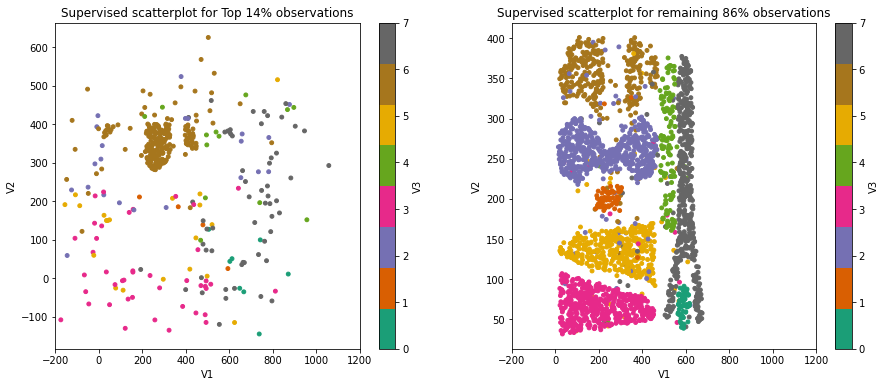

In [219]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
df14.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[0], s=15)
df86.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[1], s=15)
axes[0].set_title('Supervised scatterplot for Top 14% observations')
axes[1].set_title('Supervised scatterplot for remaining 86% observations')
axes[0].set_xlim([-200,1200])
axes[1].set_xlim([-200,1200])

In [143]:
df21 = df_final.head(int(len(df_final)*(21/100)))
df79 = df_final[~df_final.isin(df21)].dropna()
pd.merge(df79,df21, how='inner')

,V1,V2,y_by_maximization_score,y_by_maximization_cluster,V3


(-200.0, 1200.0)

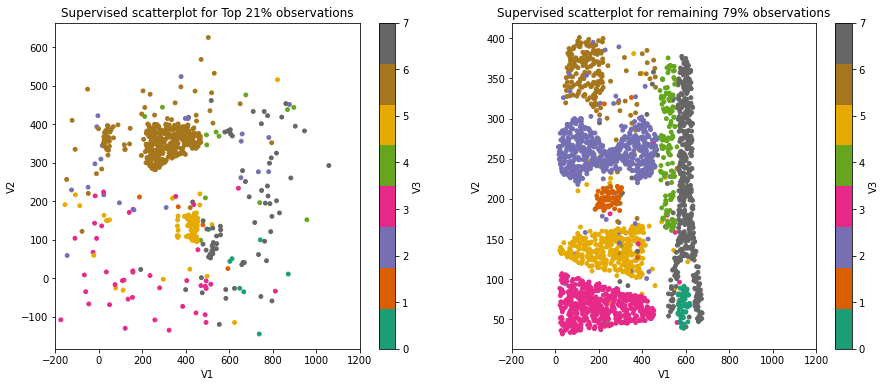

In [218]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
df21.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[0], s=15)
df79.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[1], s=15)
axes[0].set_title('Supervised scatterplot for Top 21% observations')
axes[1].set_title('Supervised scatterplot for remaining 79% observations')
axes[0].set_xlim([-200,1200])
axes[1].set_xlim([-200,1200])

In [240]:
df21


,V1,V2,y_by_maximization_score,y_by_maximization_cluster,V3
2884,-260.826641,-135.295733,9.234291,1,3
2851,1057.381435,292.557139,8.860470,1,7
2751,-283.459797,325.352742,8.595261,1,6
2907,-222.692610,419.199246,8.480466,1,6
2607,956.494535,151.661096,7.694791,1,4
...,...,...,...,...,...
1496,360.877000,135.827000,0.000000,0,5
1497,361.789000,151.029000,0.000000,0,5
1498,362.986000,105.904000,0.000000,0,5
1499,363.991000,161.374000,0.000000,0,5


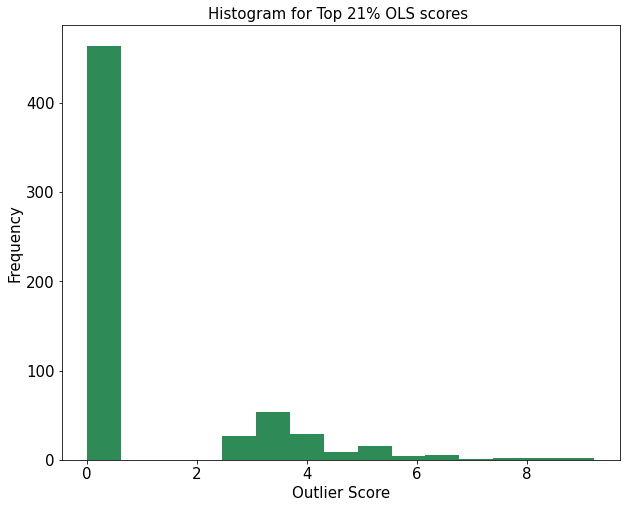

In [252]:
plt.figure(figsize=(10,8))
plt.hist(df21[['y_by_maximization_score']], bins=15, align='mid', rwidth=20, color='seagreen')
plt.title("Histogram for Top 21% OLS scores ",fontsize=15)
plt.xlabel('Outlier Score',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()